#사용법

1. 우측 상단 '로그인'

2. 좌측 상단 '실습 모드에서 열기' 또는 'Drive에 사본 저장'

※ 각각의 셀은 셀 좌측 상단 실행 버튼을 통해 실행할 수 있습니다.

※ 혹은 CTRL + ENTER로 실행 가능합니다.

※ 실행 중 '경고: 이 노트는 Google에서 작성하지 않았습니다.'라는 창이 뜰 경우, '실행 전에 모든 런타임 재설정'란에 체크 후 '무시하고 계속하기'를 하시면 됩니다.

In [ ]:
# google drive 연동
# 모두 '예' 선택
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# 실습에 필요한 코드 클론(이미 있다면 Pass)
!git clone https://github.com/oglee815/nlp_basic.git

Cloning into 'nlp_basic'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 748.73 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
%cd /content/drive/MyDrive/nlp_basic

/content/drive/MyDrive/nlp_basic


# 신경망 연습

## 싱글 노드 퍼셉트론
다음과 같은 하나의 퍼셉트론을 계산하는 방법을 살펴보겠습니다.

<img src="https://github.com/oglee815/nlp_basic/blob/main/img/perceptron.png?raw=true" width="400">


입력은 x1, x2로 두개이며, 웨이트(엣지) 또한 w1, w2로 두개입니다.

입력 데이터가 신경망에 입력되는 과정은 입력 행렬과 웨이트 행렬 간의 곱셈으로 간단히 표현 가능합니다.

$$
X=\begin{bmatrix}
x_1 \ x_2
\end{bmatrix} \\
W=
\begin{bmatrix}
w_1 \\ w_2
\end{bmatrix}\\
X \cdot W = x_1w_1 + x_2w_2
$$

이후 bias가 더해집니다.
$$x_1w_1 + x_2w_2 + b$$

마지막으로 step function 혹은 sigmoid와 같은 activation function을 적용하면 최종 출력 값 y를 얻게 됩니다.

$$\text{step}(x_1w_1 + x_2w_2 + b)=y$$



In [ ]:
# 퍼셉트론 구현
import numpy as np
X = np.array([1, 2]) # 입력 데이터
W = np.array([0.1, -0.2]) # 웨이트
b = np.array([5]) # 바이어스
out = np.dot(X, W) + b # 퍼셉트론에 입력

def step_function(val):
    if val > 0:
        return 1
    else:
        return 0

out = step_function(out)
print(out)

0


## 멀티 노드 퍼셉트론

이번엔 다음 그림과 같이 노드가 여러개인 퍼셉트론을 만들어 보겠습니다.


<img src="https://github.com/oglee815/nlp_basic/blob/main/img/multi_nodes.png?raw=true" width="300">

이번엔 노드가 2개 이므로, 웨이트가 4개가 되고 바이어스 또한 2개가 됩니다.

$$
\textbf{X}=\begin{bmatrix}
x_1 \
x_2
\end{bmatrix} \\
\textbf{W}=
\begin{bmatrix}
w_1 \ w_3 \\
w_2 \ w_4
\end{bmatrix}\\
\textbf{b}=
\begin{bmatrix}
b_1 \\ b_2
\end{bmatrix}\\
$$

입력과 웨이트 간의 행렬곱이 되는 과정은 다음과 같습니다.

$$\textbf{X} \cdot \textbf{W} + \textbf{b} =
\begin{bmatrix}
x_1w_1 + x_2w_2 +b_1, \ x_1w_3 + x_2w_4+b_2
\end{bmatrix} \\
$$

이제 마찬가지로 Step/sigmoid function과 같은 Activation function을 통과시켜주면 결과값을 얻을 수 있습니다.

$$\text{sigmoid}(x_1w_1 + x_2w_2 + b_1)=y_1 \\ \text{sigmoid}(x_1w_3 + x_2w_4 + b_2)=y_2$$


In [ ]:
# 멀티 노드 퍼셉트론 구현
import numpy as np
X = np.array([1, 2]) # 입력 데이터
W = np.array([[0.1, 0.2], [0.4, 0.5]]) # 웨이트
b = np.array([1, 2])# 바이어스
out = np.dot(X, W) + b # 퍼셉트론에 입력

def sigmoid(x):
    return 1/(1+np.exp(-x))

out = sigmoid(out)
print(out)

[0.86989153 0.96083428]


## 멀티 레이어 퍼셉트론

이제 레이어가 여러개인 신경망에 대해서 알아보겠습니다.

<img src="https://github.com/oglee815/nlp_basic/blob/main/img/mlp.png?raw=true" width="400">

조금 복잡해보이지만, W와 b를 하나씩 더 추가해주면 됩니다.

$$ \textbf{X}=
\begin{bmatrix}
x_1 \
x_2
\end{bmatrix} \\
\textbf{W}_1=
\begin{bmatrix}
w_{11} \ w_{13} \\
w_{12} \ w_{14}
\end{bmatrix},
\textbf{W}_2=\begin{bmatrix}
w_{21} \ w_{23} \\
w_{22} \ w_{24}
\end{bmatrix} \\
\textbf{b}_1=
\begin{bmatrix}
b_{11} \\ b_{12}
\end{bmatrix} ,\textbf{b}_2=
\begin{bmatrix}
b_{21} \\ b_{22}
\end{bmatrix}
$$

우선 아까와 같이 1층부터 통과한 값을 z1, z2라고 하겠습니다.

$$\textbf{X} \cdot \textbf{W}_1 + \textbf{b}_1 = \\
\begin{bmatrix}
\text{sigmoid}(x_1w_{11} + x_2w_{12} + b_{11})\\ \text{sigmoid}(x_1w_{13} + x_2w_{14} + b_{12})
\end{bmatrix}
= \begin{bmatrix}z_1 \\ z_2 \end{bmatrix}
$$

이제 이 값들이 2번째 층의 입력이 되게 됩니다.

$$\textbf{Z} \cdot \textbf{W}_2 + \textbf{b}_2 = \\
\begin{bmatrix}
\text{sigmoid}(z_1w_{21} + z_2w_{22} + b_{21})\\ \text{sigmoid}(z_1w_{13} + z_2w_{24} + b_{22})
\end{bmatrix}
= \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}
$$



In [ ]:
# 멀티 노드 퍼셉트론 구현
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

X = np.array([1, 2]) # 입력 데이터
W1 = np.array([[0.1, 0.2], [0.4, 0.5]]) # 1층 웨이트
W2 = np.array([[-0.1, 0.3], [0.4, -0.1]]) # 2층 웨이트
b1 = np.array([1, 2 ])# 1층 바이어스
b2 = np.array([3, 4 ])# 2층 바이어스

Z = np.dot(X, W1) + b1 # 1층에 입력
Z = sigmoid(Z)

out = np.dot(Z, W2) + b2 # 2층에 입력
out = sigmoid(out)
print(out)

[0.9643376  0.98470602]


# 분류 모델 실습

지금부터 해볼 실습은 신경망을 활용한 나선형 데이터 분류 작업입니다.

데이터는 아래 그림처럼 나선형으로 생긴 3개의 클래스를 가지고 있습니다.

입력 데이터는 x, y좌표 값을 가진 2차원 데이터입니다.

정답은 3개의 클래스중 정답 위치에 1이 표시되어 있습니다.

input_data [[-0.          0.        ]
 [ 0.00108323  0.00994116]
 [ 0.00611274  0.01904296]]
label [[1 0 0]
 [1 0 0]
 [1 0 0]]


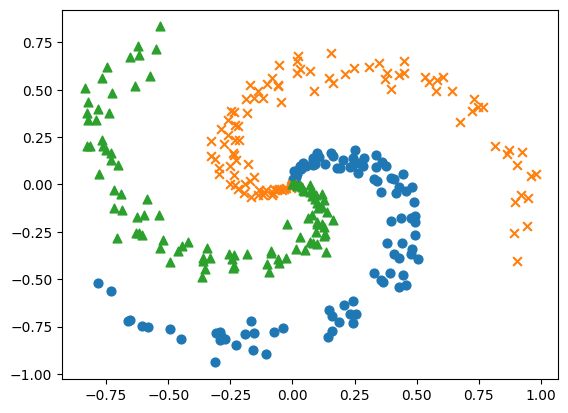

In [ ]:
# coding: utf-8
from dataset import spiral
import matplotlib.pyplot as plt
import random

# 데이터 로드
input_data, label = spiral.load_data(seed=100) # seed를 바꾸면 매번 조금씩 다른 데이터가 생성
print('input_data', input_data[:3]) # 입력 데이터
print('label', label[:3])  # 정답 데이터

# 데이터 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(input_data[i*N:(i+1)*N, 0], input_data[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 모델 아키텍처

In [ ]:
# coding: utf-8
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class Affine:
    """
    Affine 계층 (완전 연결 계층)
    Activation Function이 없는 Perceptron이라고 이해

    Attributes:
        params (list): 가중치(W)와 편향(b)을 저장하는 리스트
        grads (list): 가중치(W)와 편향(b)에 대한 기울기를 저장하는 리스트
        x (ndarray): forward 계산 시 입력 데이터를 저장 (backward 계산에 사용)
    """
    def __init__(self, W, b):
        """
        Affine 계층 초기화
        Args:
            W (ndarray): 가중치 행렬
            b (ndarray): 편향 벡터
        """
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]  # 기울기 초기화
        self.x = None

    def forward(self, x):
        """
        순전파 계산
        Args:
            x (ndarray): 입력 데이터
        Returns:
            ndarray: Affine 변환 결과
        """
        W, b = self.params
        out = np.dot(x, W) + b  # Affine 변환 계산
        self.x = x  # 입력 데이터 저장
        return out

    def backward(self, dout):
        """
        역전파 계산
        Args:
            dout (ndarray): 출력층 쪽에서 전달되는 기울기
        Returns:
            ndarray: 입력층 쪽으로 전달되는 기울기
        """
        W, b = self.params
        dx = np.dot(dout, W.T)  # 입력 데이터에 대한 기울기 계산
        dW = np.dot(self.x.T, dout)  # 가중치에 대한 기울기 계산
        db = np.sum(dout, axis=0)  # 편향에 대한 기울기 계산

        self.grads[0][...] = dW  # 가중치 기울기 저장
        self.grads[1][...] = db  # 편향 기울기 저장
        return dx

class MultiLayerNet:
    """
    다층 신경망 (Multi-Layer Neural Network)

    Attributes:
        input_size (int): 입력층의 뉴런 수
        hidden_size (int): 은닉층의 뉴런 수
        output_size (int): 출력층의 뉴런 수
        layers (list): 신경망을 구성하는 계층들을 저장하는 리스트
        loss_layer (SoftmaxWithLoss): 손실 함수 계층
        params (list): 모든 계층의 가중치와 편향을 저장하는 리스트
        grads (list): 모든 계층의 가중치와 편향에 대한 기울기를 저장하는 리스트
    """
    def __init__(self, input_size, hidden_size, output_size):
        """
        다층 신경망 초기화

        Args:
            input_size (int): 입력층의 뉴런 수
            hidden_size (int): 은닉층의 뉴런 수
            output_size (int): 출력층의 뉴런 수
        """
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화 (Initialize weights and biases)
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성 (Create layers)
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다. (Gather all weights and gradients)
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        """
        예측 (Prediction)

        Args:
            x (ndarray): 입력 데이터

        Returns:
            ndarray: 예측 결과
        """
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        """
        순전파 (Forward propagation)

        Args:
            x (ndarray): 입력 데이터
            t (ndarray): 정답 레이블

        Returns:
            float: 손실 값
        """
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        """
        역전파 (Backpropagation)

        Args:
            dout (float): 출력층 쪽에서 전달되는 기울기 (초기값은 1)

        Returns:
            ndarray: 입력층 쪽으로 전달되는 기울기
        """
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


## 하이퍼 파라미터 정의

**하이퍼 파라미터란?**

머신러닝에서는 2가지 파라미터가 있음

- 모델 파라미터: 모델이 학습 과정에서 데이터로부터 자동으로 배우는 값들로서 신경망의 가중치(weights)와 편향(biases) 등을 의미
- 하이퍼 파라미터: 모델 학습 시작 전에 사용자가 직접 설정해야 하는 값들입니다. 이 값들은 모델의 구조나 학습 방법에 영향을 미치며, 모델의 성능에 큰 영향을 미칩니다. 하이퍼 파라미터는 학습 과정에서 자동으로 업데이트되지 않으며, 최적의 값을 찾기 위해 다양한 시도를 통해 튜닝(tuning)해야 합니다.

**가장 중요한 하이퍼 파라미터**

1. **Batch Size (배치 크기):**
Batch size는 모델을 학습시킬 때 한 번의 파라미터 업데이트(iteration)에 사용되는 데이터 샘플의 개수를 의미. 전체 학습 데이터를 한 번에 모두 사용하여 모델 파라미터를 업데이트하는 대신, 데이터를 작은 덩어리(batch)로 나누어 사용함.

    - Batch size가 모델 학습에 미치는 영향:

        - 작은 배치 크기: 메모리 사용량이 적음. 손실 함수의 변동이 크고, 지역 최솟값에서 탈출할 가능성이 높음.
        - 큰 배치 크기: 메모리 사용량이 많음. 업데이트당 시간이 더 오래 걸리지만, 경사 계산이 더 정확하여 수렴이 안정적.

2. **Epoch (에폭)**:
Epoch는 전체 학습 데이터셋을 모델이 한 번 완전히 통과하여 학습을 마치는 과정을 의미.
모델은 에폭을 반복하며 학습 데이터셋을 여러 번 보게 됨. 각 에폭이 완료될 때마다 모델은 데이터셋 전체를 한 번 학습한 것입니다. 배치 크기를 사용하는 경우, 한 에폭은 (전체 샘플 수 / 배치 크기) 만큼의 반복(iteration) 또는 스텝(step)으로 구성된다.

    - Epoch 수가 모델 학습에 미치는 영향:

        - 적은 에폭: 모델이 데이터를 충분히 학습하지 못하여 **과소적합(underfitting)**이 발생할 수 있음. 훈련 데이터에서도 성능이 낮게 나옵니다.
        - 많은 에폭 수: 모델이 데이터를 너무 많이 학습하여 **과적합(overfitting)**이 발생할 수 있음. 훈련 데이터에서는 성능이 매우 좋게 나오지만, 처음 보는 데이터(검증/테스트 데이터)에서는 성능이 떨어짐.
학습 시간이 오래 걸림.

In [ ]:
# coding: utf-8
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정
max_epoch = 100
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data(seed=1234)
model = MultiLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

## 학습 시작

In [ ]:
# 학습 시작
for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |  반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.19
| 에폭 3 |  반복 10 / 10 | 손실 1.13
| 에폭 4 |  반복 10 / 10 | 손실 1.14
| 에폭 5 |  반복 10 / 10 | 손실 1.12
| 에폭 6 |  반복 10 / 10 | 손실 1.13
| 에폭 7 |  반복 10 / 10 | 손실 1.13
| 에폭 8 |  반복 10 / 10 | 손실 1.13
| 에폭 9 |  반복 10 / 10 | 손실 1.11
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.15
| 에폭 12 |  반복 10 / 10 | 손실 1.09
| 에폭 13 |  반복 10 / 10 | 손실 1.07
| 에폭 14 |  반복 10 / 10 | 손실 1.05
| 에폭 15 |  반복 10 / 10 | 손실 1.02
| 에폭 16 |  반복 10 / 10 | 손실 0.99
| 에폭 17 |  반복 10 / 10 | 손실 0.93
| 에폭 18 |  반복 10 / 10 | 손실 0.91
| 에폭 19 |  반복 10 / 10 | 손실 0.89
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.84
| 에폭 22 |  반복 10 / 10 | 손실 0.80
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.77
| 에폭 25 |  반복 10 / 10 | 손실 0.77
| 에폭 26 |  반복 10 / 10 | 손실 0.76
| 에폭 27 |  반복 10 / 10 | 손실 0.75
| 에폭 28 |  반복 10 / 10 | 손실 0.74
| 에폭 29 |  반복 10 / 10 | 손실 0.75
| 에폭 30 |  반복 10 / 10 | 손실 0.77
| 에폭 31 |  반복 10 / 10 | 손실 0.73
| 에폭 32 |  반복 10 

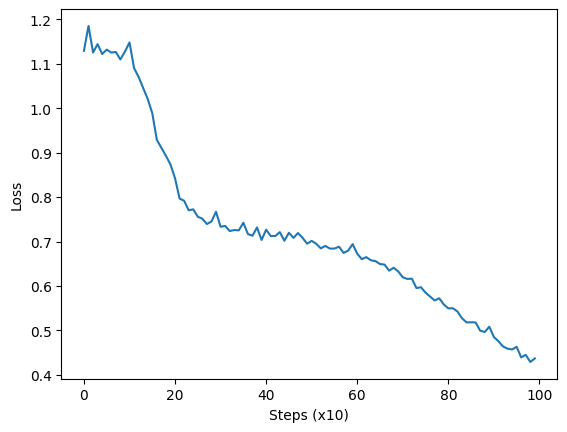

In [ ]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('Steps (x10)')
plt.ylabel('Loss')
plt.show()

## 평가 시작

In [ ]:
# 테스트 데이터 로드 (x: 입력 데이터, t: 정답 레이블)
test_x, test_t = spiral.load_data(seed=5678)

score = model.predict(test_x)  # 모델을 사용해 격자 점들에 대한 예측 점수 계산
predict_cls = np.argmax(score, axis=1)  # 각 점에 대해 가장 높은 점수를 가진 클래스 선택
label = np.argmax(test_t, axis=1) # 정답 레이블
print(f"정확도:{float(sum(label == predict_cls)/len(label)):.4}") # 정확도 측정

정확도:0.8433


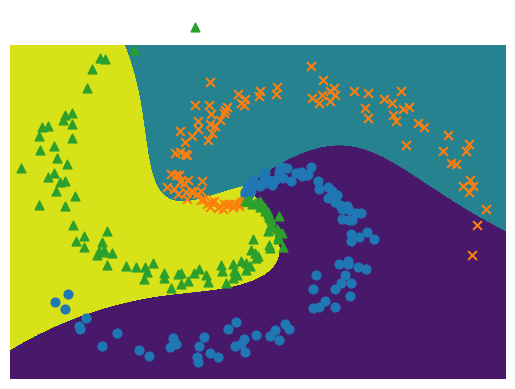

In [ ]:
# 경계 영역 플롯
h = 0.001  # 경계 영역을 그릴 때 사용할 격자의 간격 설정
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1  # x축의 최소값과 최대값 설정 (여유 공간 0.1 추가)
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1  # y축의 최소값과 최대값 설정 (여유 공간 0.1 추가)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # x, y축의 격자 생성
X = np.c_[xx.ravel(), yy.ravel()]  # 격자를 2차원 배열로 변환 (모든 점의 좌표를 나열)
score = model.predict(X)  # 모델을 사용해 격자 점들에 대한 예측 점수 계산
predict_cls = np.argmax(score, axis=1)  # 각 점에 대해 가장 높은 점수를 가진 클래스 선택
Z = predict_cls.reshape(xx.shape)  # 예측 결과를 격자 형태로 변환
plt.contourf(xx, yy, Z)  # 예측 결과를 기반으로 경계 영역을 색으로 채워서 플롯
plt.axis('off')  # 축을 숨김

# 데이터점 플롯
x, t = spiral.load_data()  # 데이터 로드 (x: 입력 데이터, t: 정답 레이블)
N = 100  # 클래스당 데이터 개수
CLS_NUM = 3  # 클래스 개수
markers = ['o', 'x', '^']  # 클래스별로 사용할 마커 설정
for i in range(CLS_NUM):  # 각 클래스에 대해 반복
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])  # 해당 클래스의 데이터 점을 플롯
plt.show()  # 플롯 출력

# 추가 문제

1. 정확도를 최대한 높일 수 있도록 하이퍼 파라미터를 조정해보세요

2. 레이어를 3개로 늘려 보세요.